1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [442]:
from scipy import stats

lambda_ = 6.3 
observed = 15

p_value = 1 - stats.poisson.cdf(observed - 1, lambda_)
significance_level = 0.022

is_significant = p_value < significance_level

print(f"The probability that 15 or more hurricances are observed in a single year: {p_value*100}%")
print(f"Is observing 15 or more hurricances in a single year signficantly largere than the other years: {is_significant}")


The probability that 15 or more hurricances are observed in a single year: 0.22171227900731338%
Is observing 15 or more hurricances in a single year signficantly largere than the other years: True


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [443]:
import numpy as np

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

t_stat, p_value = stats.ttest_rel(pre, post)
#assuming significance level of 5%
alpha = 0.05
is_significant = p_value < alpha
print(f"P-value from Student's t-test on the two datasets: {p_value}")
print(f"With a significance level of 5% the change in blood pressures within our sample is statistically significant: {is_significant}")


P-value from Student's t-test on the two datasets: 0.00012027728364544626
With a significance level of 5% the change in blood pressures within our sample is statistically significant: True


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

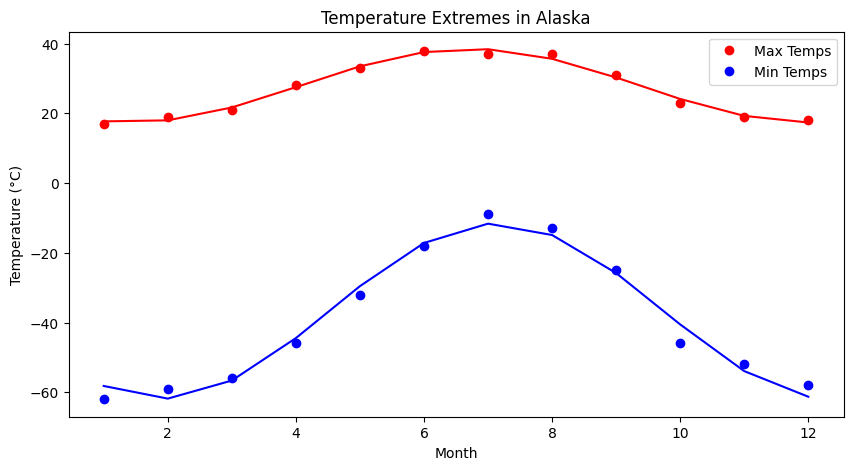

In [444]:
import matplotlib.pyplot as plt
import scipy
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1, 13)

plt.figure(figsize=(10, 5))
plt.plot(months, max_temps, 'ro', label='Max Temps')
plt.plot(months, min_temps, 'bo', label='Min Temps')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Extremes in Alaska')
plt.legend()

def sinusoidal(x, A, B, C, D):
    return A * np.sin(B * (x + C)) + D
params_max, _ = scipy.optimize.curve_fit(sinusoidal, months, max_temps, p0=[20, 2*np.pi/12, 0, 20])
params_min, _ = scipy.optimize.curve_fit(sinusoidal, months, min_temps, p0=[-20, 2*np.pi/12, 0, -20])


plt.plot(months, sinusoidal(months, *params_max), 'r-', label='Fitted Max Temps Curve')
plt.plot(months, sinusoidal(months, *params_min), 'b-', label='Fitted Min Temps Curve')
plt.show()


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

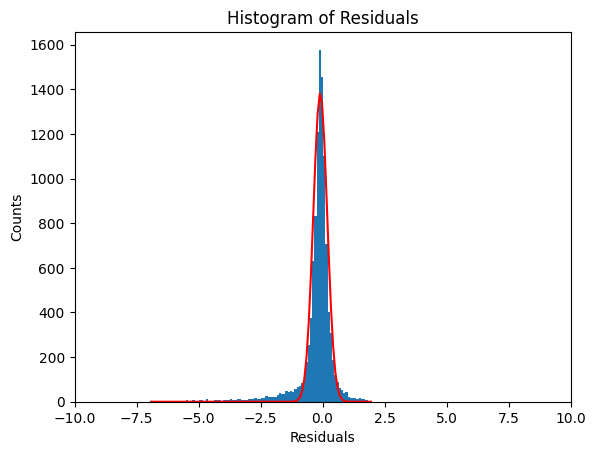

P-vlaue form the chi2 test: 1.30681160861129e-228, with 5% as significance level, the fitted function is appropriate: False


In [445]:
import pandas as pd
import pickle
from scipy.stats import chi2_contingency


filename = "residuals_261.pkl"
with open(filename, 'rb') as infile:
    residuals_data = pickle.load(infile).item()

df = pd.DataFrame(residuals_data)
def remove_outliers(data, lower_bound, upper_bound):
    return data[(data >= lower_bound) & (data <= upper_bound)]

without_outliers = remove_outliers(df['residuals'], -7, 2)
n_bins = 100
hist_values, bin_edges, _ = plt.hist(without_outliers, bins=n_bins)
sum_hist = np.sum(hist_values)
plt.xlabel('Residuals')
plt.ylabel('Counts')
plt.title('Histogram of Residuals')
plt.xlim(-10, 10)


poisson_uncertainty = np.sqrt(hist_values)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

params, cov_matrix = scipy.optimize.curve_fit(scipy.stats.norm.pdf, bin_centers, hist_values, p0=[0, 1], sigma=poisson_uncertainty)
fitted_values = scipy.stats.norm.pdf(bin_centers, *params)*sum_hist
plt.plot(bin_centers, fitted_values * np.diff(bin_edges), label='Fit', color='r')
plt.show()


expected_frequencies = scipy.stats.norm.pdf(bin_centers, *params) * np.sum(hist_values) * np.diff(bin_edges)
mask = hist_values > 0
chi2_stat, p_value = chi2_contingency([hist_values[mask], expected_frequencies[mask]])[:2]
is_appropriate = p_value >= 0.05 

print(f"P-vlaue form the chi2 test: {p_value}, with 5% as significance level, the fitted function is appropriate: {is_appropriate}")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Amplitude (a): -10.018433888658821, and its standard deviations: 0.15571942543272232
Phase shift (b): -0.22420626263147672, and its standard deviations: 0.015544450724796195
Vertical shift (c): 9.352349010140884, and its standard deviations: 0.11011026107944742
The overall average temperature in Munich: 9.352349010140884
The maximum temperature predicted by the model: |a| + c = 10.018433888658821 + 9.352349010140884 = 19.370782898799703
The maximum temperature predicted by the model: c - |a| = 9.352349010140884 - 10.018433888658821 = -0.6660848785179372


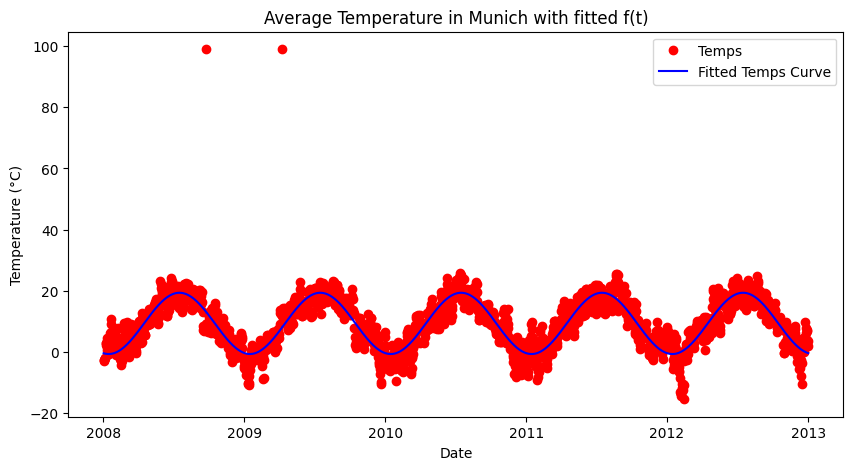

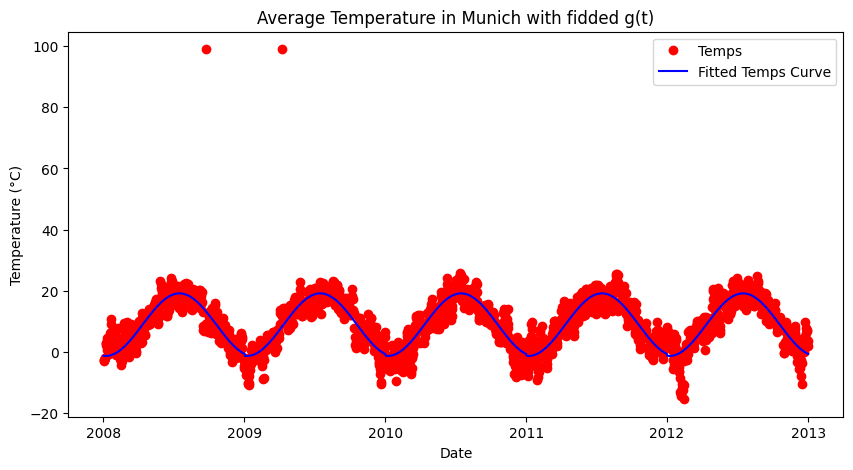

RSS for f(t): 40359.24462543124, RSS for g(t): 40261.206592759976
F-statistic: 4.436660265397038
p-value: 0.03531143949629978
As the F-statistic value is quite high, the additional parameter of g(t) is explaining a significant amount of variance in the data
The p-value is very small, which indicates that the results are statistically significant. 
Based on these two values the additional parameter is motivated.


In [487]:
from datetime import datetime, timedelta

df = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep='\s+', header=None, names=['date', 'temp'])

def fractional_year_to_datetime(year_fraction):
    year = int(year_fraction)
    remainder = year_fraction - year
    # Convert the fractional part of the year to a datetime
    start = datetime(year, 1, 1)
    end = datetime(year + 1, 1, 1)
    return start + timedelta(seconds=(end - start).total_seconds() * remainder)


df['date'] = df['date'].apply(fractional_year_to_datetime)
filtered_df = df[df['date'].dt.year.between(2008, 2012)]

def f(t, a, b, c):
    return (a*np.cos(2*np.pi*t+b) + c)

days_per_year_2008_to_2012 = [366, 365, 365, 365, 365]
t = np.concatenate([np.arange(0, 1, 1/(days)) for days in days_per_year_2008_to_2012])


params, cov_matrix = scipy.optimize.curve_fit(f, t, filtered_df['temp'], p0=[15, 1, 9])
sdr_params = np.sqrt(np.diag(cov_matrix))


print(f"Amplitude (a): {params[0]}, and its standard deviations: {sdr_params[0]}")
print(f"Phase shift (b): {params[1]}, and its standard deviations: {sdr_params[1]}")
print(f"Vertical shift (c): {params[2]}, and its standard deviations: {sdr_params[2]}")

print(f"The overall average temperature in Munich: {params[2]}")
print(f"The maximum temperature predicted by the model: |a| + c = {abs(params[0])} + {params[2]} = {abs(params[0]) + params[2]}")
print(f"The maximum temperature predicted by the model: c - |a| = {params[2]} - {abs(params[0])} = {params[2] - abs(params[0])}")


# The 'b' parameter represents the phase shift of the temperature cycle.
# A negative 'b' value indicates that the peak temperatures occur earlier in the year.

plt.figure(figsize=(10, 5))
plt.plot(filtered_df['date'], filtered_df['temp'], 'ro', label='Temps')
fitted_curv_f = f(t, params[0], params[1], params[2])
plt.plot(filtered_df['date'], fitted_curv_f, 'b-', label='Fitted Temps Curve')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature in Munich with fitted f(t)')
plt.legend()
plt.show()

def g(t, a, b, c, d):
    return a*np.sin(2*np.pi*t*b + c) + d

params, cov_matrix = scipy.optimize.curve_fit(g, t, filtered_df['temp'], p0=[15, 1, 1, 9])
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['date'], filtered_df['temp'], 'ro', label='Temps')
fitted_curv_g =  g(t, params[0], params[1], params[2], params[3])
plt.plot(filtered_df['date'], fitted_curv_g, 'b-', label='Fitted Temps Curve')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature in Munich with fidded g(t)')
plt.legend()
plt.show()

residuals_f = filtered_df['temp'] - fitted_curv_f
rss_f = np.sum(residuals_f**2)
residuals_g = filtered_df['temp'] - fitted_curv_g
rss_g = np.sum(residuals_g**2)
print(f"RSS for f(t): {rss_f}, RSS for g(t): {rss_g}")

p1 = 3 #Number of parameters in f
p2 = 4 #Number of parameters in g
n = len(filtered_df) # Number of data points
numerator = (rss_f - rss_g) / (p2 - p1)
denominator = rss_g / (n - p2)
F = numerator / denominator

dfn = p2 - p1 # degrees of freedom in the numerator
dfd = n - p2 # degrees of freedom in the denominator
p_value = 1 - scipy.stats.f.cdf(F, dfn, dfd)
print("F-statistic:", F)
print("p-value:", p_value)
print(f"As the F-statistic value is quite high, the additional parameter of g(t) is explaining a significant amount of variance in the data")
print(f"The p-value is very small, which indicates that the results are statistically significant. \nBased on these two values the additional parameter is motivated.")